# UNCOVERING INCOME TAX FRAUD: A LOGISTIC REGRESSION APPROACH FOR DETECTION AND PREVENTION

# Data Pre-processing

In [1]:
# Loading the OpenML Income Dataset
import pandas as pd
income_data = pd.read_csv("census-income.csv")

In [2]:
# Displaying first 5 rows
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Structure of the dataset
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# No of rows and columns
income_data.shape

(48842, 15)

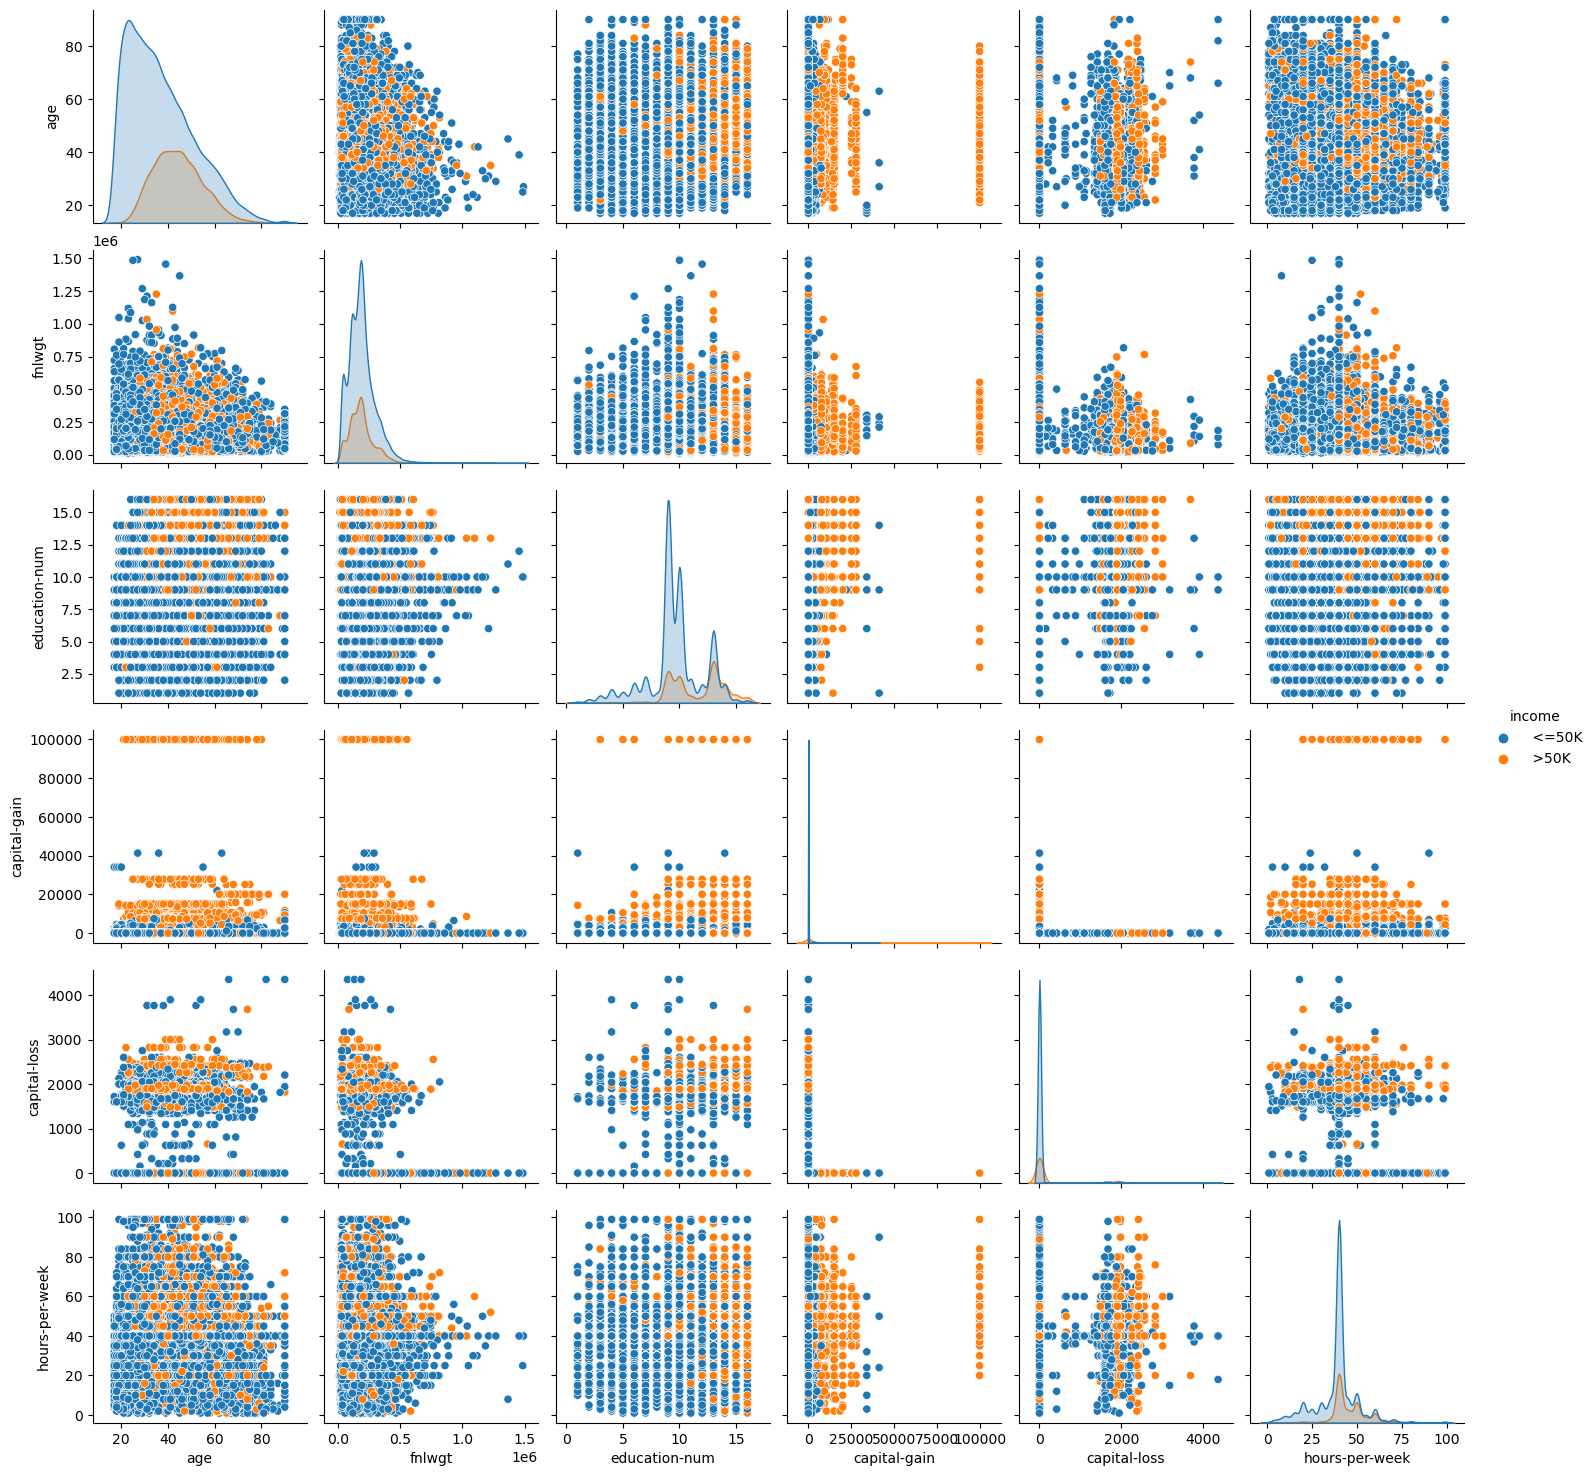

In [5]:
# Performing exploratory data analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(income_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']], hue='income')
plt.show()

In [24]:
# Feature engineering
relevant_features = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country', 'income']
income_data = income_data[relevant_features]

Demographic factors - Age, Workclass, Race, Sex, Native-country, Income

Behavioral factors - Education, Marital-status, Occupation, Relationship, Hours-per-week

# Data Splitting

In [9]:
# Splitting the dataset into 80% as training and 20% as testing.
from sklearn.model_selection import train_test_split
X = income_data.drop(['income'], axis=1)
y = income_data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Encode categorical variables and Scale the numerical variables

In [10]:
# Scaling the dataset to ensure that each feature has the same scale
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# defining column transformer to encode categorical variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# defining the columns that are categorical variables
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# defining the column transformer with both the scaler and the encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in X_train.columns if col not in categorical_cols]),
        ('cat', categorical_transformer, categorical_cols)
    ])

# fit and transform the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Training models

In [11]:
#Train various machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

models = [("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000, solver='saga')),
("Decision Tree", DecisionTreeClassifier(random_state=42)),
("Random Forest", RandomForestClassifier(random_state=42)),
("Feed Forward Neural Network", MLPClassifier(random_state=42, max_iter=1000)),
("k-Nearest Neighbors", KNeighborsClassifier()),
("Naive Bayes", GaussianNB())]

#converting X_train and X_test from a sparse matrix to a dense matrix using numpy array before passing it to the models.
X_train = X_train.toarray()
X_test = X_test.toarray()

for name, model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model.fit(X_train, y_train)

# Model Evaluation

In [12]:
# Evaluate the performance of each model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, auc
results = {}
for name, model in models:
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=' >50K'),
        'Recall': recall_score(y_test, y_pred, pos_label=' >50K'),
        'F1-score': f1_score(y_test, y_pred, pos_label=' >50K')
    }
results_df = pd.DataFrame(results).T
print(results_df)


                             Accuracy  Precision    Recall  F1-score
Logistic Regression          0.842973   0.703883  0.569869  0.629826
Decision Tree                0.787184   0.547077  0.535371  0.541161
Random Forest                0.820248   0.629990  0.565066  0.595764
Feed Forward Neural Network  0.825366   0.627178  0.628821  0.627998
k-Nearest Neighbors          0.824445   0.632917  0.597817  0.614866
Naive Bayes                  0.608660   0.366626  0.920087  0.524325


# Visualisation

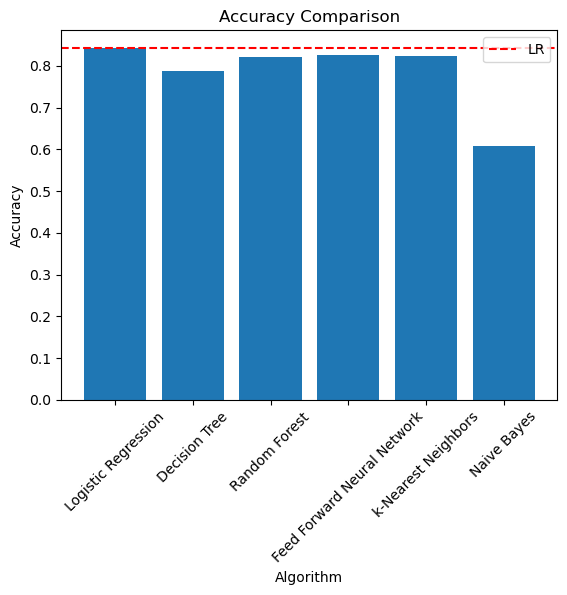

In [14]:
#visualisations comparation of the performance of different algorithms
# Bar Plot
import matplotlib.pyplot as plt

plt.bar(results_df.index, results_df['Accuracy'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.axhline(y=results_df.loc['Logistic Regression', 'Accuracy'], color='r', linestyle='--', label='LR')
plt.legend()
plt.show()

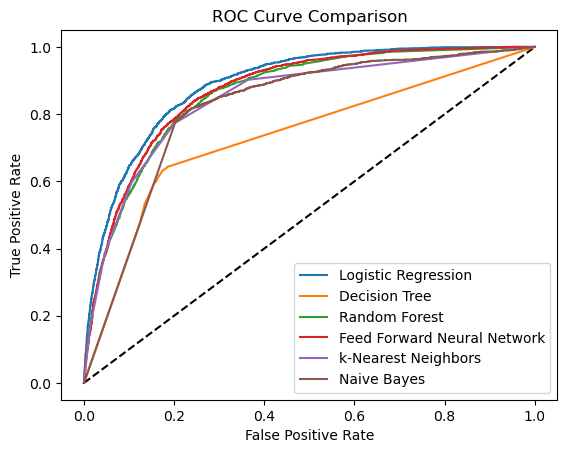

In [15]:
#ROC curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve

# convert categorical labels to binary labels
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)

plt.plot([0, 1], [0, 1], 'k--')
for name, model in models:
    fpr, tpr, thresholds = roc_curve(y_test_binary, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=name)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()



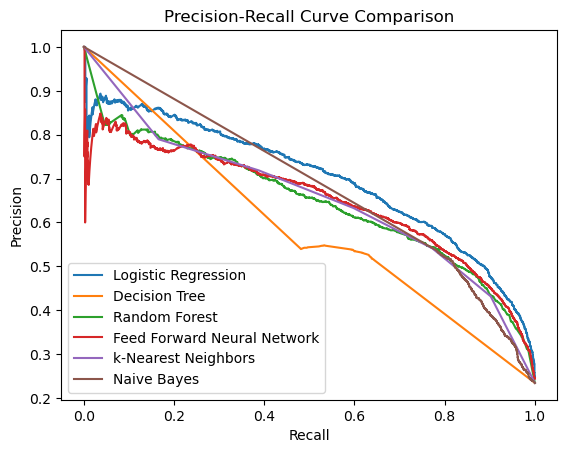

In [16]:
#Precision-Recall Curve
for name, model in models:
  precision, recall, thresholds = precision_recall_curve(y_test_binary, model.predict_proba(X_test)[:,1])
  plt.plot(recall, precision, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()

In [17]:
#Performing cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np
for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    print("Model: ", name)
    print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Model:  Logistic Regression
Mean cross-validation score: 0.8346172945234638
Model:  Decision Tree
Mean cross-validation score: 0.7825865720373295
Model:  Random Forest
Mean cross-validation score: 0.817162880366683
Model:  Feed Forward Neural Network
Mean cross-validation score: 0.8193381089868617
Model:  k-Nearest Neighbors
Mean cross-validation score: 0.8182374679046269
Model:  Naive Bayes
Mean cross-validation score: 0.6050464955559648


# Hyperparameter Tuning

In [18]:
#Using hyperparameter tuning to optimize the performance of the best-performing model
from sklearn.model_selection import GridSearchCV

lr_params = {"C": np.logspace(-3, 3, 7)}
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000, solver='saga'), lr_params, cv=10)
lr_grid_search.fit(X_train, y_train)
best_lr_model = lr_grid_search.best_estimator_

print(f"Best model: {best_lr_model}")

Best model: LogisticRegression(max_iter=1000, random_state=42, solver='saga')


In [16]:
#Evaluate the performance of the best-performing model
y_pred = best_lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=' >50K')
recall = recall_score(y_test, y_pred, pos_label=' >50K')
f1 = f1_score(y_test, y_pred, pos_label=' >50K')
print(f"Best model performance: {best_lr_model}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("")

Best model performance: LogisticRegression(max_iter=1000, random_state=42, solver='saga')
Accuracy: 0.8429726686457161
Precision: 0.7038834951456311
Recall: 0.5698689956331878
F1 Score: 0.6298262548262549



In [19]:
# Determine the threshold for identifying suspicious tax returns
best_lr_model.fit(X_train, y_train)
y_proba = best_lr_model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba, pos_label=' >50K')
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba, pos_label=' >50K')
auc_score = auc(fpr, tpr)

# Plot the Precision-Recall curve and the ROC curve
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot the Precision-Recall curve
ax1.plot(recall, precision, color='orange', label=f"Area under PR curve: {auc_score:.2f}")
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Precision-Recall Curve')
ax1.legend()

# Plot the ROC curve
ax2.plot(fpr, tpr, color='green', label=f"Area under ROC curve: {auc_score:.2f}")
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend()

In [20]:
# Set the threshold for identifying suspicious tax returns
threshold = 0.35
print(f"Threshold for identifying suspicious tax returns: {threshold:.2f}")

# Identify suspicious tax returns
best_lr_model.fit(X_train, y_train)
y_proba = best_lr_model.predict_proba(X_test)[:,1]
y_pred = (y_proba >= threshold).astype(int) #creates a binary classification based on the threshold
fraudulent_cases = X_test[y_pred==1, :10] # select only the columns used for prediction
fraudulent_cases_df = pd.DataFrame(fraudulent_cases, columns=X.columns[:10])
print(f"Number of suspicious tax returns identified: {len(fraudulent_cases)}")

Threshold for identifying suspicious tax returns: 0.35
Number of suspicious tax returns identified: 2769


# Model Comparison

In [21]:
#Compare the performance of each model
names = []
accuracies = []
precisions = []
recalls = []
f1s = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=' >50K')
    recall = recall_score(y_test, y_pred, pos_label=' >50K')
    f1 = f1_score(y_test, y_pred, pos_label=' >50K')
    names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    results_df = pd.DataFrame({"Model": names, "Accuracy": accuracies, "Precision": precisions, "Recall": recalls, "F1 Score": f1s})
print(results_df)

                         Model  Accuracy  Precision    Recall  F1 Score
0          Logistic Regression  0.842973   0.703883  0.569869  0.629826
1                Decision Tree  0.787184   0.547077  0.535371  0.541161
2                Random Forest  0.820248   0.629990  0.565066  0.595764
3  Feed Forward Neural Network  0.825366   0.627178  0.628821  0.627998
4          k-Nearest Neighbors  0.824445   0.632917  0.597817  0.614866
5                  Naive Bayes  0.608660   0.366626  0.920087  0.524325
